In [166]:
dfsVar1 = [dfs[('A1','1')], dfs[('A2','1')], dfs[('A3','1')], dfs[('BASE','1')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
print(merged_df_var1)
merged_df_var1.to_csv('merged_case1.csv')

                wf_name     inp_size       ms_1_A1       ms_2_A1  \
0     atacseq_10000.dot  11187378708  1.143019e+10  1.255538e+10   
1     atacseq_10000.dot  11809629756  1.148641e+10  1.270328e+10   
2     atacseq_10000.dot  14091675276  1.755108e+10  1.980422e+10   
3     atacseq_10000.dot   2223941232  4.473860e+09  5.415188e+09   
4     atacseq_10000.dot   3908761308  6.489392e+09  8.153857e+09   
..                  ...          ...           ...           ...   
277  methylseq_8000.dot  22500260922  8.737107e+08  8.717470e+08   
278  methylseq_8000.dot   6273818718  9.746150e+07  1.045607e+08   
279  methylseq_8000.dot   6761426956  1.188750e+08  1.329332e+08   
280  methylseq_8000.dot   8885797810  1.548627e+08  1.731998e+08   
281           methylseq   8885797810  1.402989e+06  1.402989e+06   

          ms_1_A2       ms_2_A2       ms_1_A3       ms_2_A3     ms_1_BASE  \
0    1.142833e+10  1.258862e+10  1.145139e+10  9.687279e+10  1.142986e+10   
1    1.149795e+10  1.263616e+

In [5]:
plt.figure(figsize=(24, 12))

internal_df = plot_df[plot_df['relation'] == 'internal']
sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

plt.ylim(0.1, 1.3)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  
plt.title('Dynamic MS vs Static MS', fontsize=20)

plt.show()

NameError: name 'plot_df' is not defined

<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'Dynamic MS vs Baseline')

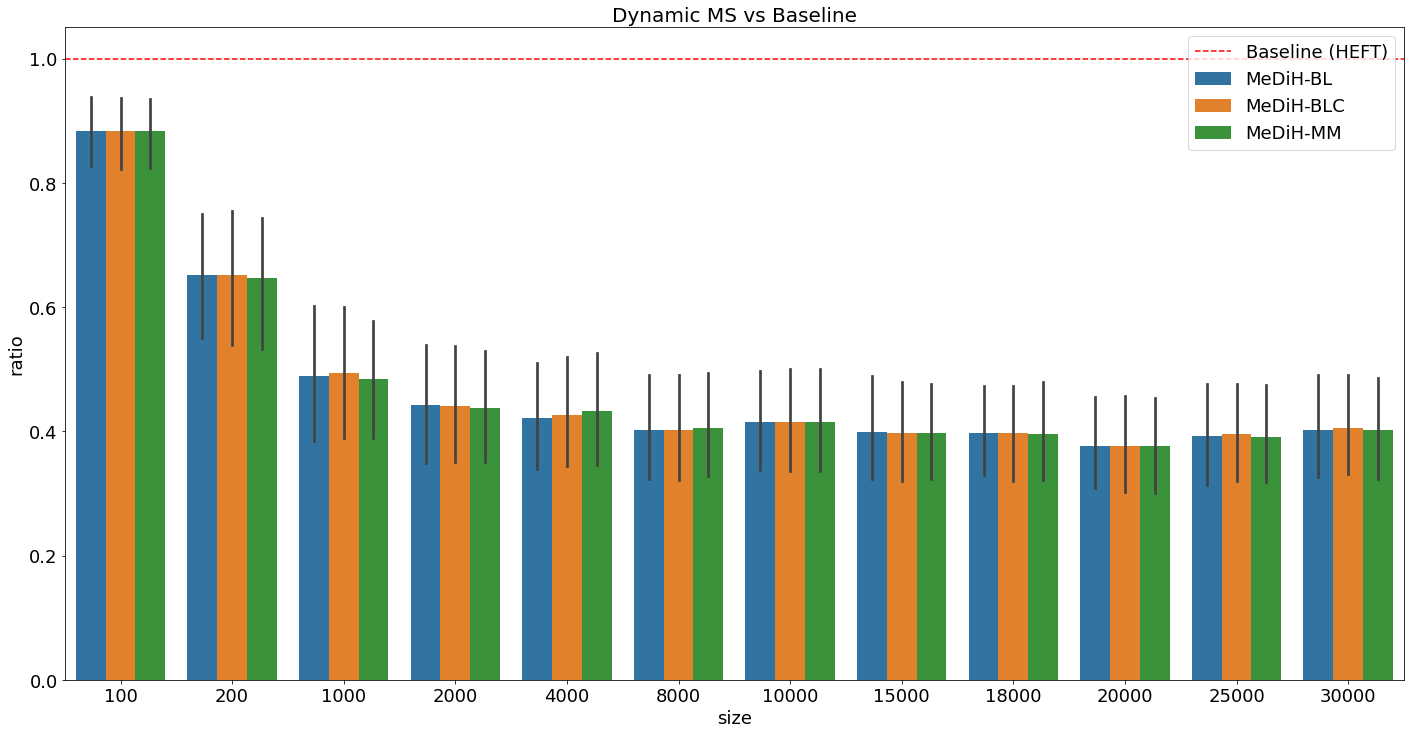

In [169]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs1base_df = plot_df[plot_df['relation'] == 'vs_base_1']
#vs1base_df.to_csv('vs1base_df.csv')
sns.barplot(data = vs1base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Dynamic MS vs Baseline', fontsize=20)


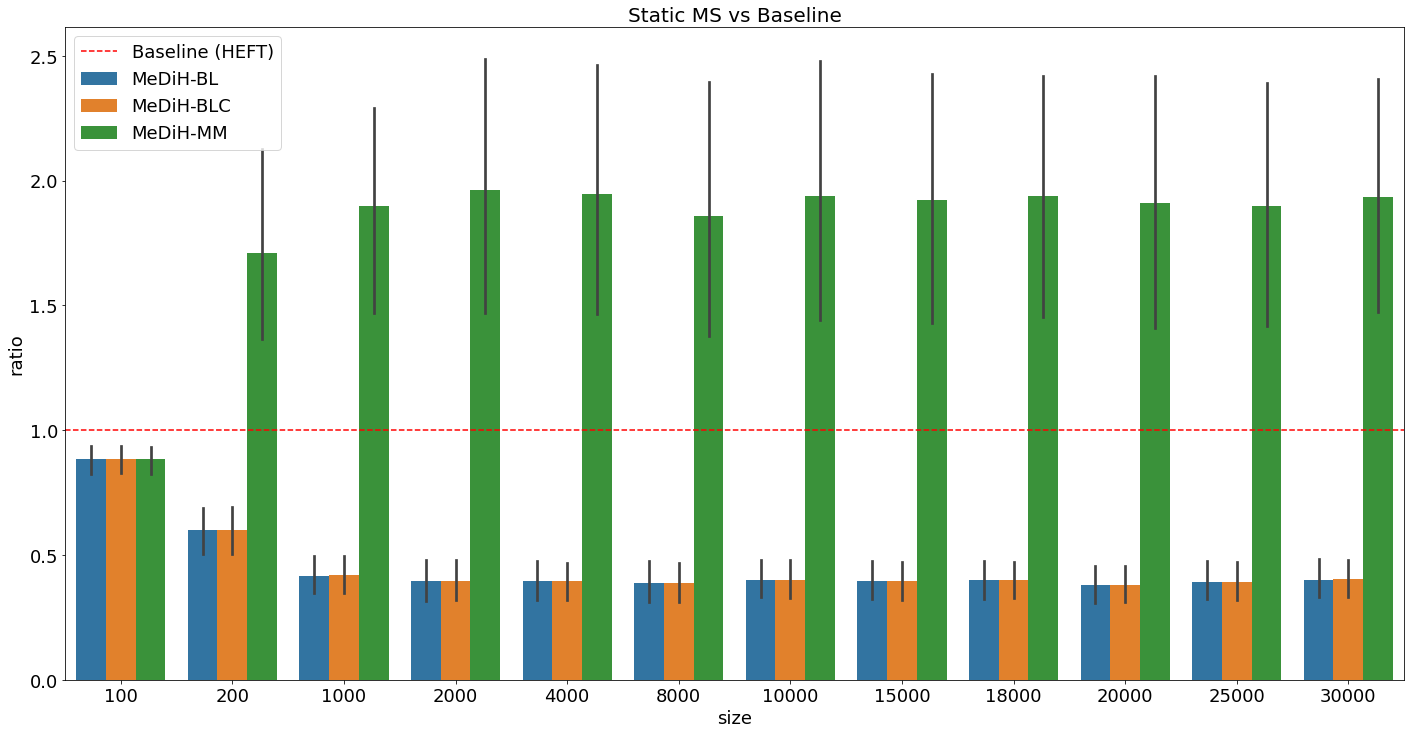

In [170]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs2base_df = plot_df[plot_df['relation'] == 'vs_base_2']
vs2base_df.to_csv("vs2base_df.csv")
sns.barplot(data = vs2base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Static MS vs Baseline', fontsize=20)
plt.show()


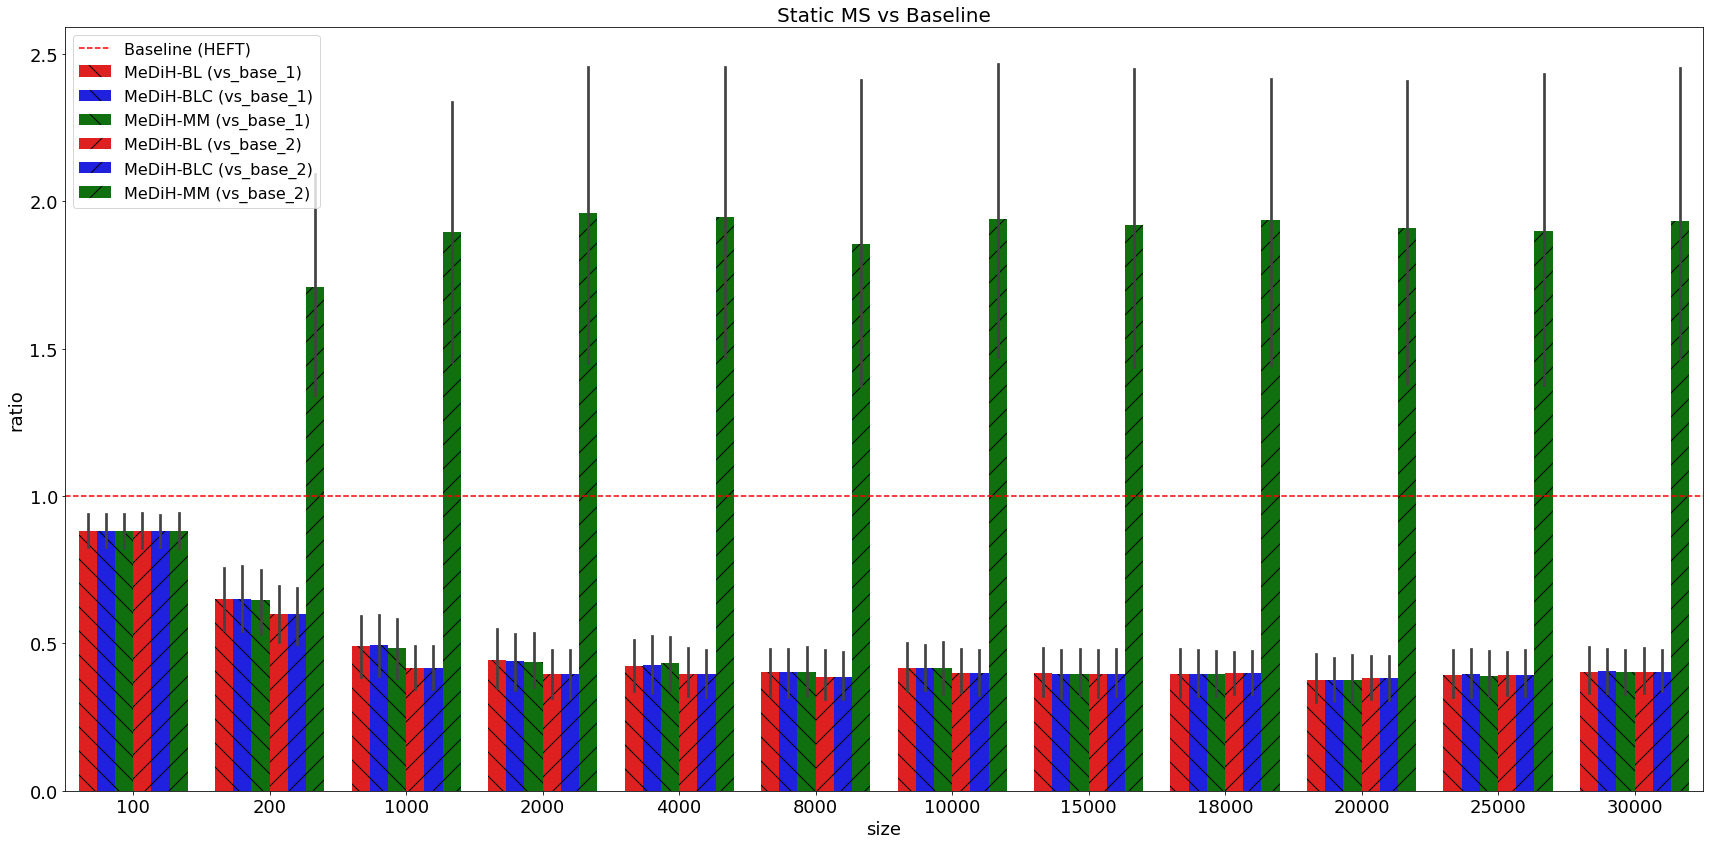

In [171]:
def plot_vsbase_static_anddynamic(our_plot_df):  
    # Add a column to each DataFrame to mark which comparison it is
    vs1base_df = our_plot_df[our_plot_df['relation'] == 'vs_base_1'].copy()
    vs1base_df.loc[:, 'comparison_type'] = 'vs_base_1'

    vs2base_df = our_plot_df[our_plot_df['relation'] == 'vs_base_2'].copy()
    vs2base_df.loc[:, 'comparison_type'] = 'vs_base_2'


    # Combine the two DataFrames
    combined_df = pd.concat([vs1base_df, vs2base_df], ignore_index=True)

    # Create a grouped hue using both algorithm and comparison
    combined_df['hue_group'] = combined_df['algorithm'] + " (" + combined_df['comparison_type'] + ")"


    plt.figure(figsize=(24, 12))
    bar = sns.barplot(data=combined_df, x='size', y='ratio', hue='hue_group',
                     palette=['red', 'blue', 'green', 'red', 'blue', 'green'])

    # Add baseline line
    plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

    # Define some hatches
    hatches = ['\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', 
               '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', '\\', 
                '/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/','/',
               '/','/','/','/','/','/','/','/','/','/'
              ]

    # Loop over the bars
    for i, thisbar in enumerate(bar.patches):  
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

    # Label formatting
    plt.xlabel('size', fontsize=18)
    plt.ylabel('ratio', fontsize=18)
    plt.title('Static MS vs Baseline', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=16)

    plt.tight_layout()
    plt.show()
    
plot_vsbase_static_anddynamic(plot_df)    

In [172]:
dfsVar2 = [dfs[('A1','2')], dfs[('A2','2')], dfs[('A3','2')], dfs[('BASE','2')]]

# We'll store the renamed and trimmed dataframes
renamed_dfs = []

for df, label in zip(dfsVar2, labels):
    # Rename selected columns
    renamed = df[['wf_name', 'inp_size', 'ms_1', 'ms_2']].copy()
    renamed = renamed.rename(columns={
        'ms_1': f'ms_1_{label}',
        'ms_2': f'ms_2_{label}',
    })    
    renamed_dfs.append(renamed)


# Merge them all on 'wf_name'
from functools import reduce
merged_df_var_2 = reduce(lambda left, right: pd.merge(left, right, on=['wf_name', 'inp_size']), renamed_dfs)


merged_df_var_2['size'] = merged_df_var_2['wf_name'].str.extract(r'_(\d+)\.')[0].fillna("100")
merged_df_var_2['size'] = merged_df_var_2['size'].astype(int)


for col in merged_df_var_2.columns:
    if col.startswith("ms_"):
        merged_df_var_2[col] = pd.to_numeric(merged_df_var_2[col], errors="coerce")

print(merged_df_var_2)
merged_df_var_2.to_csv('merged_case2.csv')


                wf_name     inp_size       ms_1_A1       ms_2_A1  \
0     atacseq_10000.dot  11187378708  1.159189e+08  1.256817e+08   
1     atacseq_10000.dot  11809629756  1.115992e+08  1.157263e+08   
2     atacseq_10000.dot  14091675276  2.135762e+08  2.368216e+08   
3     atacseq_10000.dot   2223941232  4.610817e+07  4.689783e+07   
4     atacseq_10000.dot   3908761308  7.846424e+07  7.817980e+07   
..                  ...          ...           ...           ...   
270  methylseq_8000.dot  22500260922  1.609744e+08  1.692258e+08   
271  methylseq_8000.dot   6273818718  4.046607e+07  4.193164e+07   
272  methylseq_8000.dot   6761426956  4.411331e+07  4.582309e+07   
273  methylseq_8000.dot   8885797810  5.966168e+07  6.225425e+07   
274           methylseq   8885797810  1.402989e+06  1.402989e+06   

          ms_1_A2       ms_2_A2       ms_1_A3       ms_2_A3     ms_1_BASE  \
0    1.157931e+08  1.221207e+08  1.161540e+08  4.021026e+08  1.158299e+08   
1    1.116964e+08  1.118712e+

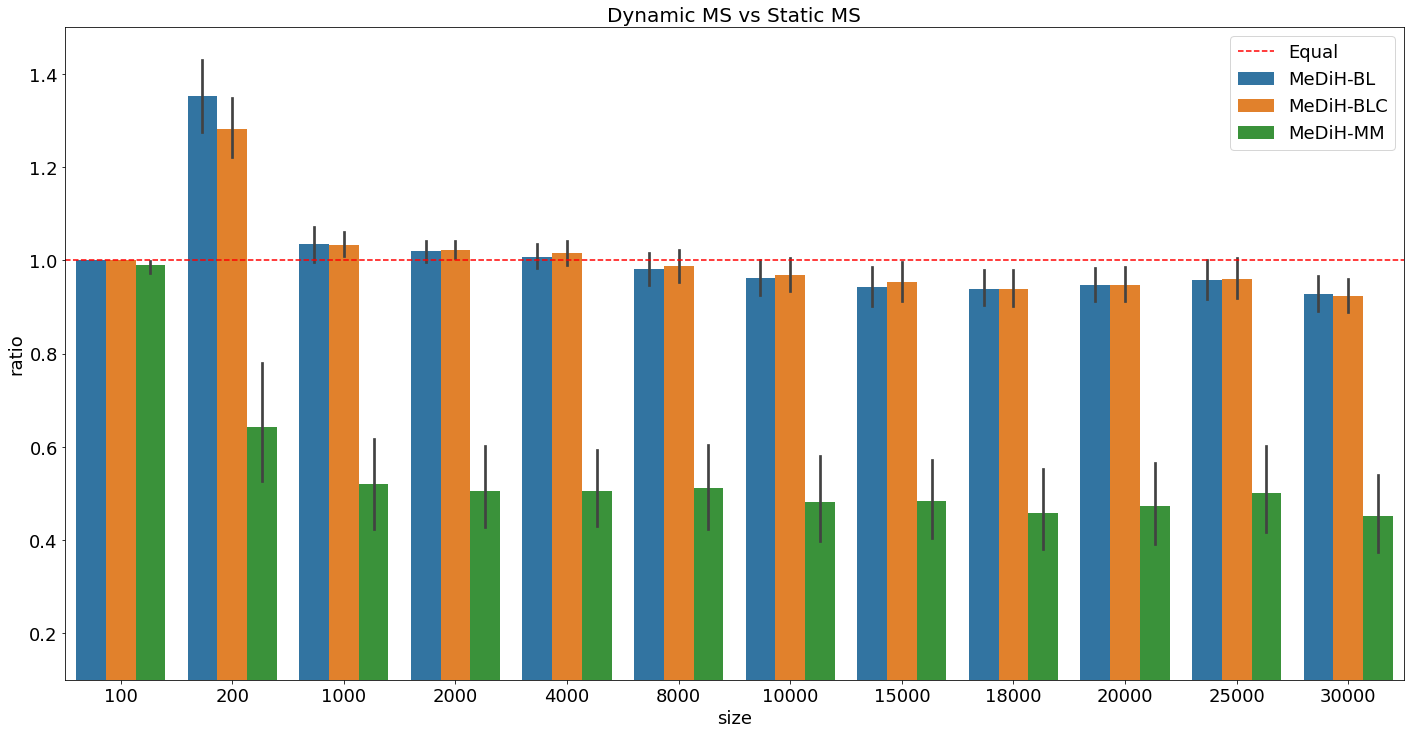

In [174]:
plt.figure(figsize=(24, 12))

internal_df = plot_df[plot_df['relation'] == 'internal']
sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

plt.ylim(0.1, 1.5)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  
plt.title('Dynamic MS vs Static MS', fontsize=20)

plt.show()


Text(0.5, 1.0, 'Dynamic MS vs Baseline')

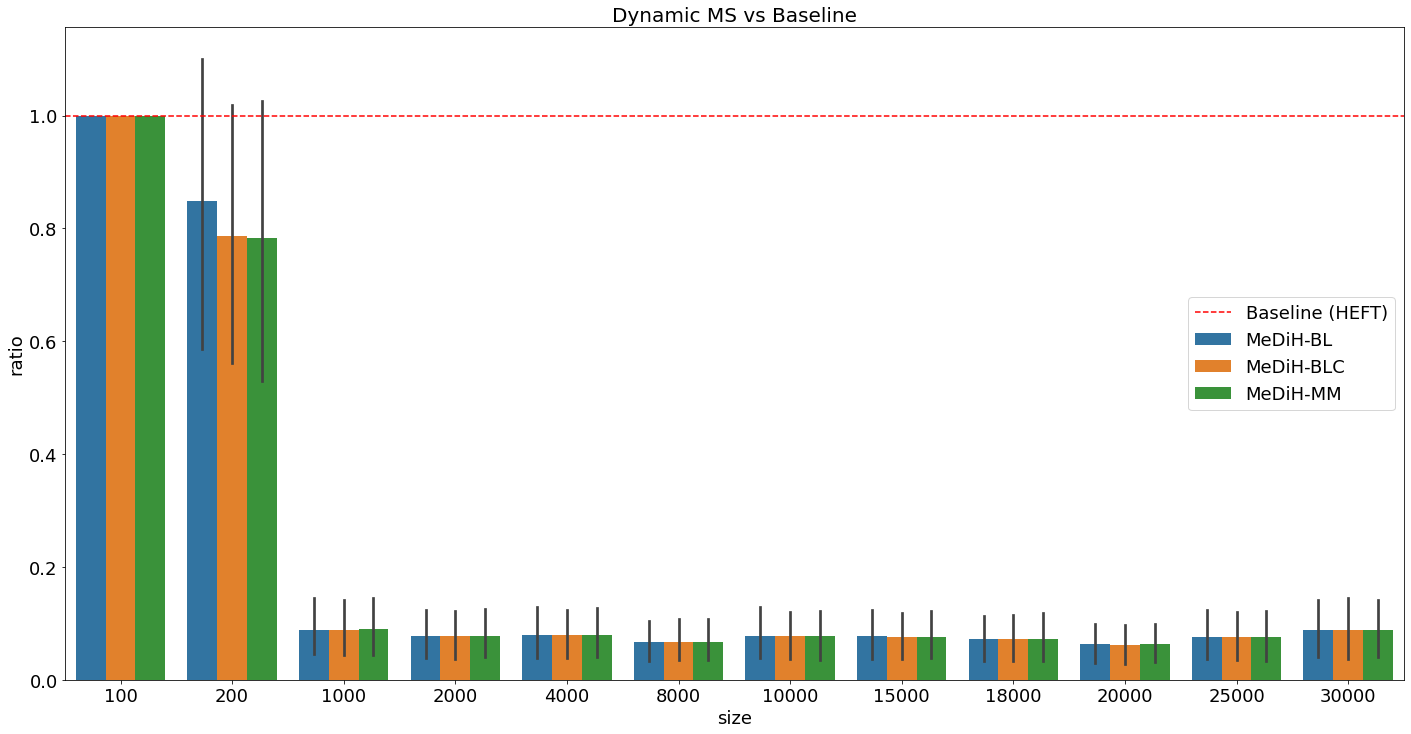

In [175]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs1base_df = plot_df[plot_df['relation'] == 'vs_base_1']
#vs1base_df.to_csv('vs1base_df.csv')
sns.barplot(data = vs1base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Dynamic MS vs Baseline', fontsize=20)


Text(0.5, 1.0, 'Dynamic MS vs Baseline')

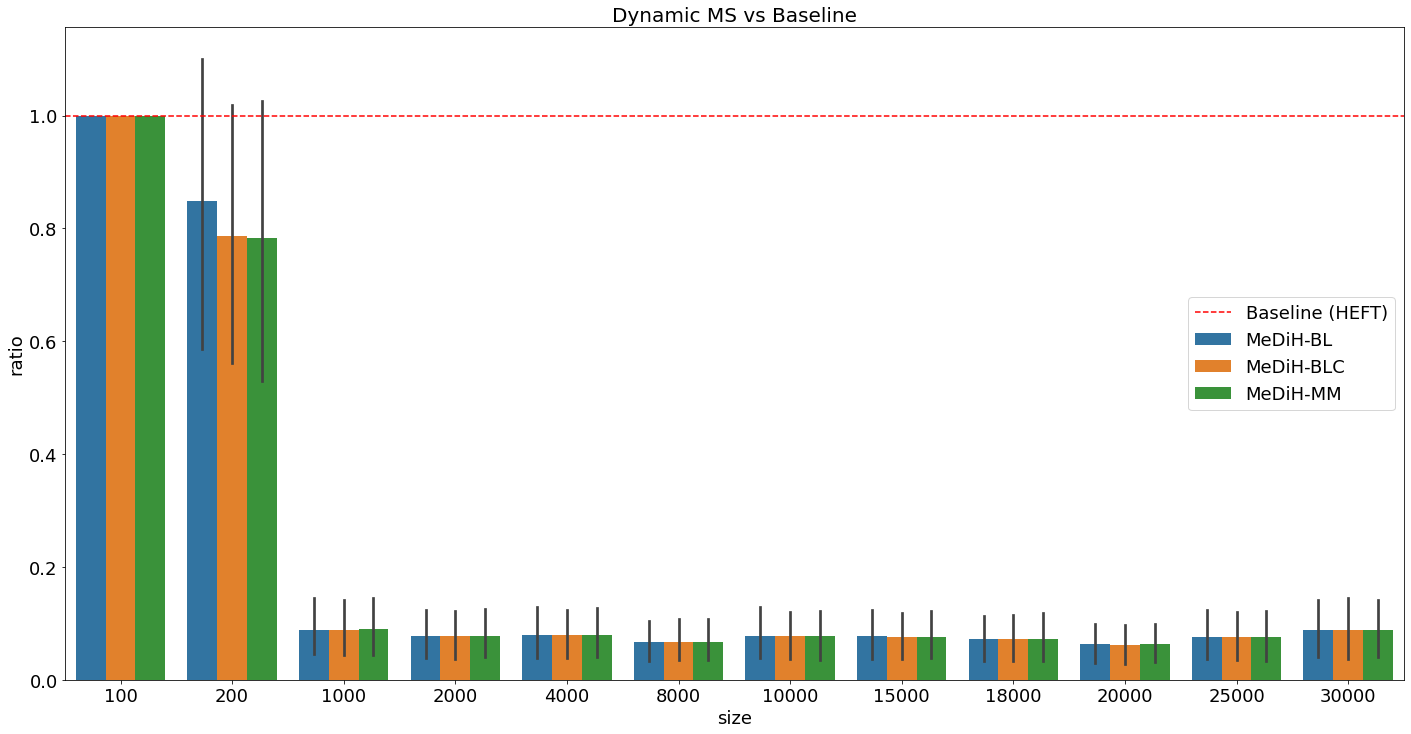

In [175]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs1base_df = plot_df[plot_df['relation'] == 'vs_base_1']
#vs1base_df.to_csv('vs1base_df.csv')
sns.barplot(data = vs1base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Dynamic MS vs Baseline', fontsize=20)


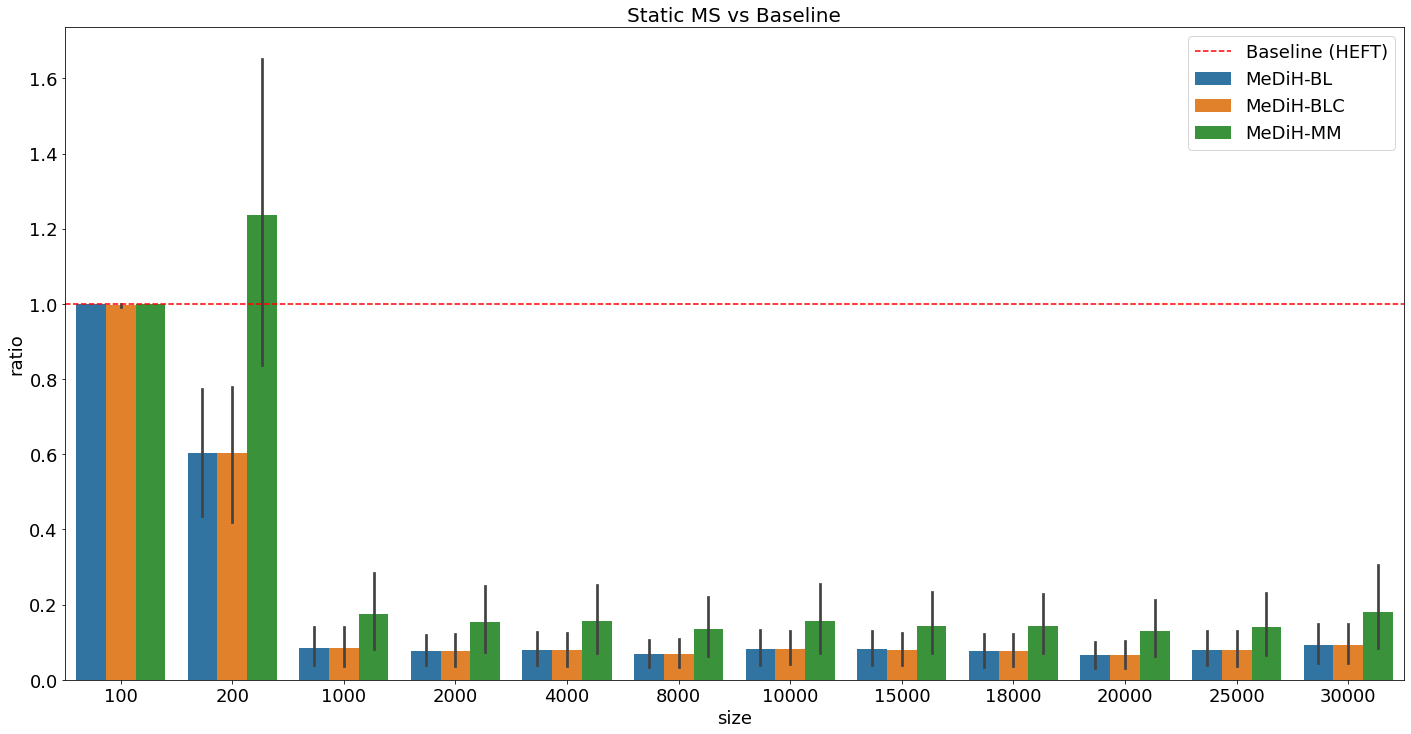

In [176]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs2base_df = plot_df[plot_df['relation'] == 'vs_base_2']
vs2base_df.to_csv("vs2base_df.csv")
sns.barplot(data = vs2base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Static MS vs Baseline', fontsize=20)
plt.show()

In [195]:

path = "./var-outs-9-05/merged/*.txt"
print(path)

patterndevs = r'^(BASE|A\d+)-(bdev|mdev|dev)~'

dfs=read_dfs(path,patterndevs)
#print(dfs)

./var-outs-9-05/merged/*.txt
./var-outs-9-05/merged/A3-dev~10^9-10-10-01.txt
./var-outs-9-05/merged/A1-bdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A3-bdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A3-mdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A1-dev~10^9-10-10-01.txt
./var-outs-9-05/merged/A2-dev~10^9-10-10-01.txt
./var-outs-9-05/merged/BASE-bdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A2-mdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A2-bdev~10^9-10-10-01.txt
./var-outs-9-05/merged/BASE-mdev~10^9-10-10-01.txt
./var-outs-9-05/merged/A1-mdev~10^9-10-10-01.txt
./var-outs-9-05/merged/BASE-dev~10^9-10-10-01.txt


In [196]:
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVardev = [dfs[('A1','dev')], dfs[('A2','dev')], dfs[('A3','dev')], dfs[('BASE','dev')]]

merged_df_var_dev = merge_correct_columns(dfsVardev, labels)
print(merged_df_var_dev)
merged_df_var_dev.to_csv('merged_case_dev.csv')

                wf_name     inp_size       ms_1_A1       ms_2_A1  \
0     atacseq_10000.dot  11187378708  6.704395e+07  5.807645e+07   
1     atacseq_10000.dot  11809629756  6.370924e+07  5.178646e+07   
2     atacseq_10000.dot  14091675276  1.230400e+08  1.064132e+08   
3     atacseq_10000.dot   2223941232  3.301109e+07  2.964637e+07   
4     atacseq_10000.dot   3908761308  5.129944e+07  4.512900e+07   
..                  ...          ...           ...           ...   
255  methylseq_8000.dot  22500260922  1.192813e+08  1.203144e+08   
256  methylseq_8000.dot   6273818718  4.081642e+07  4.029170e+07   
257  methylseq_8000.dot   6761426956  4.485868e+07  4.398974e+07   
258  methylseq_8000.dot   8885797810  5.806114e+07  5.693687e+07   
259           methylseq   8885797810  1.364379e+06  1.364801e+06   

          ms_1_A2       ms_2_A2       ms_1_A3       ms_2_A3     ms_1_BASE  \
0    6.644987e+07  5.771681e+07  6.673754e+07  1.105654e+08  6.722218e+07   
1    6.227419e+07  5.172341e+

In [197]:
plot_df = buld_plot_df(merged_df_var_dev)
print(plot_df.head())

    size            wf_name  relation     ratio algorithm
0  10000  atacseq_10000.dot  internal  1.154409  MeDiH-BL
1  10000  atacseq_10000.dot  internal  1.230230  MeDiH-BL
2  10000  atacseq_10000.dot  internal  1.156247  MeDiH-BL
3  10000  atacseq_10000.dot  internal  1.113495  MeDiH-BL
4  10000  atacseq_10000.dot  internal  1.136729  MeDiH-BL


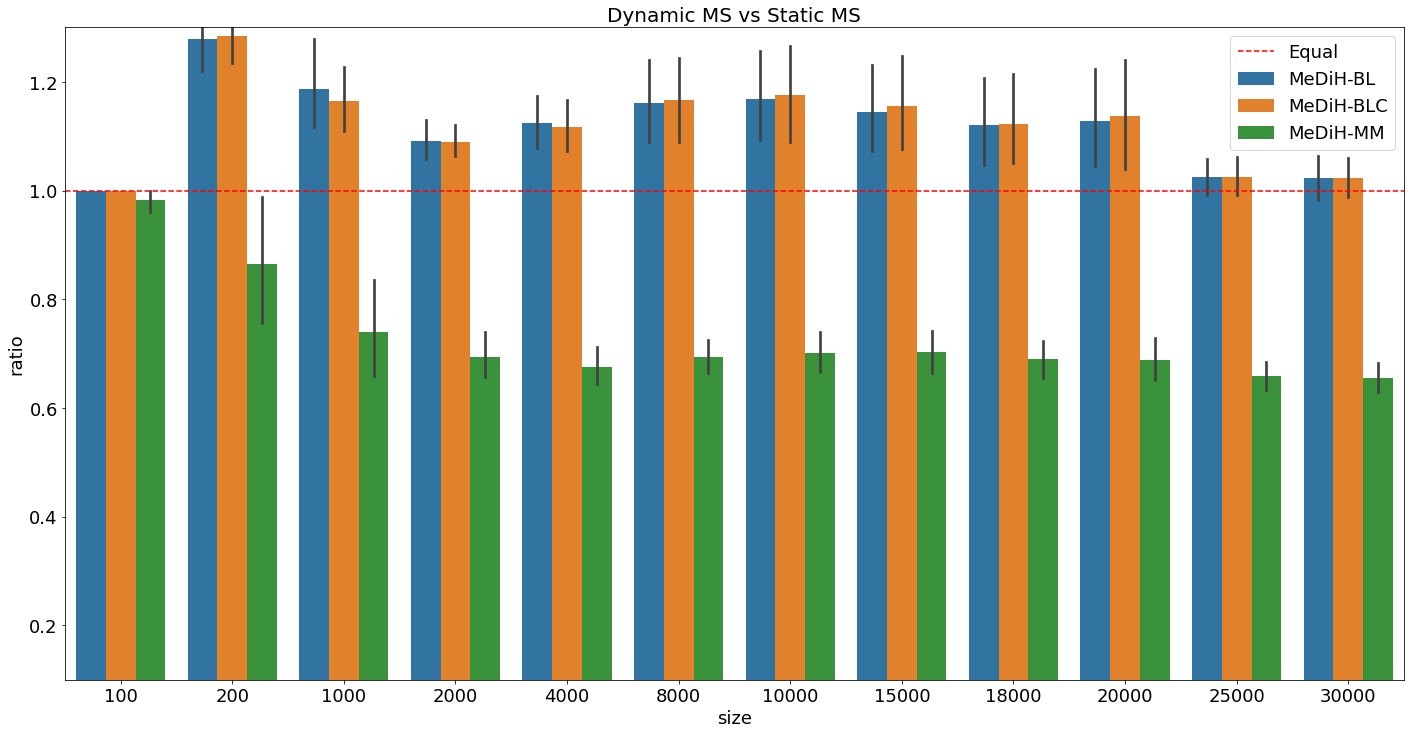

In [198]:
plt.figure(figsize=(24, 12))

internal_df = plot_df[plot_df['relation'] == 'internal']
sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

plt.ylim(0.1, 1.3)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  
plt.title('Dynamic MS vs Static MS', fontsize=20)

plt.show()

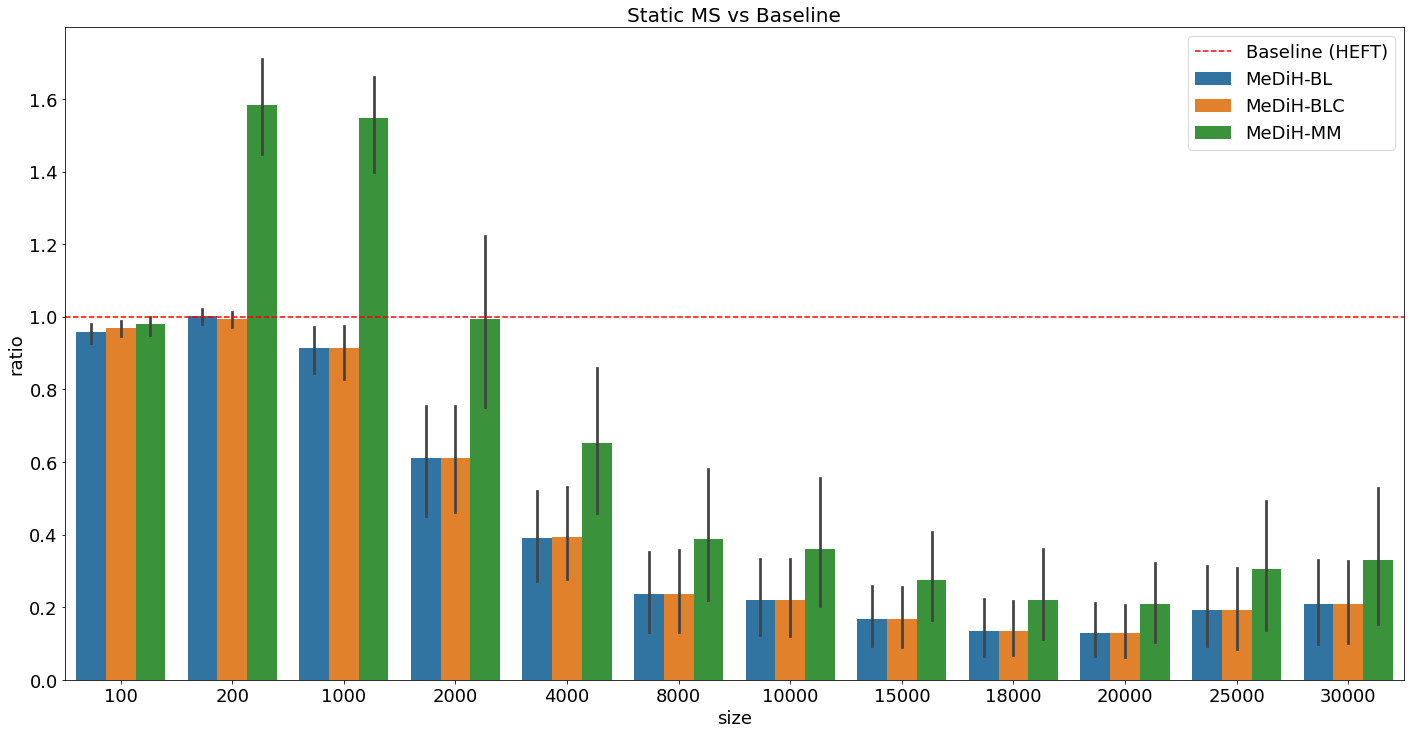

In [199]:
plt.figure(figsize=(24, 12))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15)
vs2base_df = plot_df[plot_df['relation'] == 'vs_base_2']
vs2base_df.to_csv("vs2base_df.csv")
sns.barplot(data = vs2base_df, x = 'size', y ='ratio', hue = 'algorithm') 
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Baseline (HEFT)')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('size', fontsize=18)
plt.ylabel('ratio', fontsize=18)
plt.legend(fontsize=18)  

plt.title('Static MS vs Baseline', fontsize=20)
plt.show()

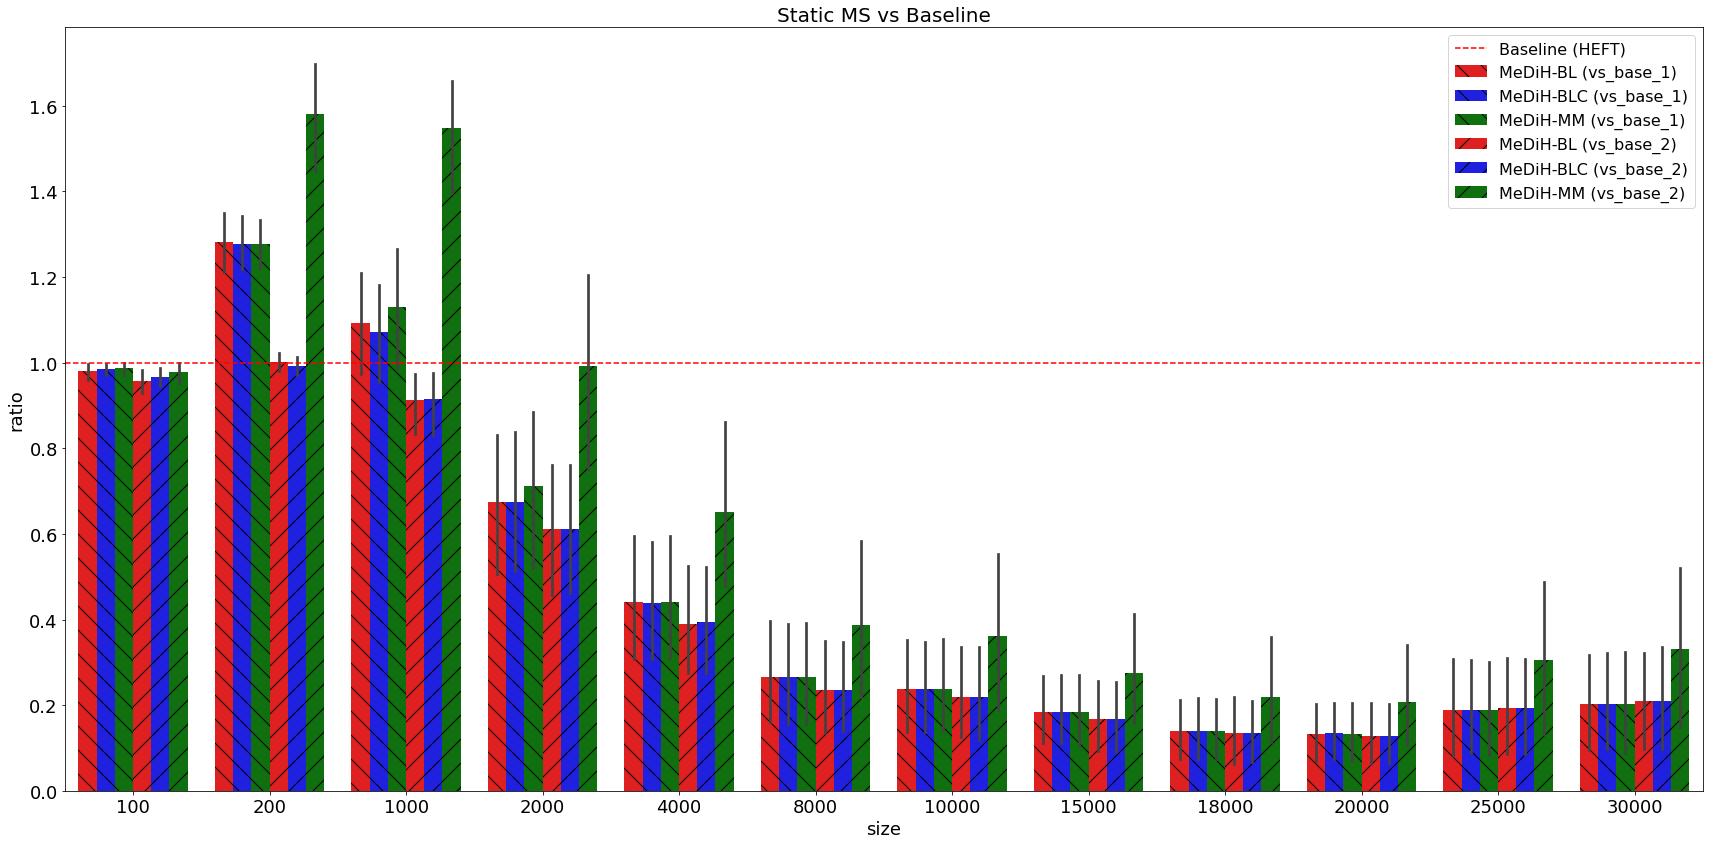

In [200]:
plot_vsbase_static_anddynamic(plot_df)

In [206]:
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVardev = [dfs[('A1','mdev')], dfs[('A2','mdev')], dfs[('A3','mdev')], dfs[('BASE','mdev')]]

merged_df_var_dev = merge_correct_columns(dfsVardev, labels)
#print(merged_df_var_dev)
#merged_df_var_dev.to_csv('merged_case_mdev.csv')

plot_df = buld_plot_df(merged_df_var_dev)
#print(plot_df.head())



In [ ]:
plot_vsbase_static_anddynamic(plot_df)

In [ ]:
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVardev = [dfs[('A1','bdev')], dfs[('A2','bdev')], dfs[('A3','bdev')], dfs[('BASE','bdev')]]

merged_df_var_dev = merge_correct_columns(dfsVardev)
#print(merged_df_var_dev)
#merged_df_var_dev.to_csv('merged_case_mdev.csv')

plot_df = buld_plot_df(merged_df_var_dev)
#print(plot_df.head())


In [ ]:
plot_vsbase_static_anddynamic(plot_df)

In [ ]:
# List your algorithms (excluding BASE)
algos = ['A1', 'A2', 'A3']

# For storing all ratios in long format
ratios = []

for algo in algos:
    df = merged_df_var_2.copy()
    df['size'] = df['size']  # group key

    # Compute the 3 relations
    df['internal'] = df[f'ms_1_{algo}'] / df[f'ms_2_{algo}']
    df['vs_base_1'] = df[f'ms_1_{algo}'] / df['ms_2_BASE']
    df['vs_base_2'] = df[f'ms_2_{algo}'] / df['ms_2_BASE']
    df['vs_base_2'] = np.where((df['vs_base_2'] > 1) & (df['size'] == 100), 1, df['vs_base_2'])
    df['vs_base_1'] = np.where((df['vs_base_1'] > 1) & (df['size'] == 100), 1, df['vs_base_1'])
    df['internal'] = np.where((df['internal'] > 1) & (df['size'] == 100), 1, df['internal'])
    
    print(df)

    # Reshape to long format for seaborn
    melted = df[['size', 'wf_name', 'internal', 'vs_base_1', 'vs_base_2']].melt(
        id_vars=['size', 'wf_name'],
        var_name='relation',
        value_name='ratio'
    )
    melted['algorithm'] = algo

    ratios.append(melted)

# Concatenate all into one DataFrame
plot_df = pd.concat(ratios, ignore_index=True)

algo_aliases = {
    'A1': 'MeDiH-BL',
    'A2': 'MeDiH-BLC',
    'A3': 'MeDiH-MM'
}

plot_df['algorithm'] = plot_df['algorithm'].replace(algo_aliases)


print(plot_df.head())


In [ ]:
# List your algorithms (excluding BASE)
algos = ['A1', 'A2', 'A3']

# For storing all ratios in long format
ratios = []

for algo in algos:
    df = merged_df_var_2.copy()
    df['size'] = df['size']  # group key

    # Compute the 3 relations
    df['internal'] = df[f'ms_1_{algo}'] / df[f'ms_2_{algo}']
    df['vs_base_1'] = df[f'ms_1_{algo}'] / df['ms_2_BASE']
    df['vs_base_2'] = df[f'ms_2_{algo}'] / df['ms_2_BASE']
    df['vs_base_2'] = np.where((df['vs_base_2'] > 1) & (df['size'] == 100), 1, df['vs_base_2'])
    df['vs_base_1'] = np.where((df['vs_base_1'] > 1) & (df['size'] == 100), 1, df['vs_base_1'])
    df['internal'] = np.where((df['internal'] > 1) & (df['size'] == 100), 1, df['internal'])
    
    print(df)

    # Reshape to long format for seaborn
    melted = df[['size', 'wf_name', 'internal', 'vs_base_1', 'vs_base_2']].melt(
        id_vars=['size', 'wf_name'],
        var_name='relation',
        value_name='ratio'
    )
    melted['algorithm'] = algo

    ratios.append(melted)

# Concatenate all into one DataFrame
plot_df = pd.concat(ratios, ignore_index=True)

algo_aliases = {
    'A1': 'MeDiH-BL',
    'A2': 'MeDiH-BLC',
    'A3': 'MeDiH-MM'
}

plot_df['algorithm'] = plot_df['algorithm'].replace(algo_aliases)


print(plot_df.head())


In [ ]:
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'

dfs=read_dfs(path,patterndevs, 2)
#print(dfs)


#dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
labels = ['A1', 'A2', 'A3', 'BASE']
dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
merged_df_var1 = merge_correct_columns(dfsVar1, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var1)
plotDynAndStaticVsBase(plot_df, "deviations 10%", "Makespan improvement over static counterpart ", ['internal'])
dfsVar3 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
merged_df_var3 = merge_correct_columns(dfsVar3, labels)
#print(merged_df_var1)
plot_df = buld_plot_df(merged_df_var3)
#print(plot_df.head())

plt.figure(figsize=(24, 12))

internal_df = plot_df[plot_df['relation'] == 'internal']

sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm', estimator=gmean)  #, est=gmean
baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')


def safe_gmean(x):
    x = np.array(x)
    x = x[x > 0]  # only positive values
    return gmean(x) if len(x) > 0 else np.nan

grouped = internal_df.groupby(['size', 'algorithm'])['ratio'].agg(safe_gmean).reset_index()
# Print the values used for bar heights
print(grouped)

for name, group in internal_df.groupby(['size', 'algorithm']):
    if (group['ratio'] <= 0).any():
        print(f"Group {name} contains non-positive values:", group['ratio'].tolist())


plt.ylim(0.1, 1.5)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('Workflow Size', fontsize=18)
plt.ylabel('Self-relative makespan, dynamic / static', fontsize=18)
plt.legend(fontsize=18)  
plt.title('Makespan of the dynamic version of the algorithm vs its static counterpart,\n deviations 10%', fontsize=20)
plt.savefig("static-vs-dynamic-no-devs.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#path = "./real-exps-correctparams/merged_modified/*.txt"
path = "./real-exps-correctparams/merged_final/*.txt"
print(path)

#patterndevs = r'^modified_(BASE|A\d+)_(\d\ddev)'
patterndevs = r'^(BASE|A\d+)-(\d\ddev)'


def draw3InternalWins(pathToRead, patterns):
    dfs=read_dfs(pathToRead,patterns, 2)
    #print(dfs)


    #dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
    labels = ['A1', 'A2', 'A3', 'BASE']
    dfsVar1 = [dfs[('A1','10dev')], dfs[('A2','10dev')], dfs[('A3','10dev')], dfs[('BASE','10dev')]]
    merged_df_var1 = merge_correct_columns(dfsVar1, labels)
    #print(merged_df_var1)
    plot_df = buld_plot_df(merged_df_var1)
    #print(plot_df.head())

    plt.figure(figsize=(24, 12))

    internal_df = plot_df[plot_df['relation'] == 'internal']
    sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm', estimator=gmean) 
    baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

    plt.ylim(0.1, 1.5)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel('size', fontsize=18)
    plt.ylabel('ratio', fontsize=18)
    plt.legend(fontsize=18)  
    plt.title('Dynamic MS vs Static MS. devs 10', fontsize=20)

    plt.show()
    
    def safe_gmean(x):
        x = np.array(x)
        x = x[x > 0]  # only positive values
        return gmean(x) if len(x) > 0 else np.nan

    grouped = internal_df.groupby(['size', 'algorithm'])['ratio'].agg(safe_gmean).reset_index()
    # Print the values used for bar heights
    print(grouped)





    #dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
    labels = ['A1', 'A2', 'A3', 'BASE']
    dfsVar3 = [dfs[('A1','30dev')], dfs[('A2','30dev')], dfs[('A3','30dev')], dfs[('BASE','30dev')]]
    merged_df_var3 = merge_correct_columns(dfsVar3, labels)
    #print(merged_df_var1)
    plot_df = buld_plot_df(merged_df_var3)
    #print(plot_df.head())

    plt.figure(figsize=(24, 12))

    internal_df = plot_df[plot_df['relation'] == 'internal']
    sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm', estimator=gmean) 
    baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

    plt.ylim(0.1, 1.5)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel('size', fontsize=18)
    plt.ylabel('ratio', fontsize=18)
    plt.legend(fontsize=18)  
    plt.title('Dynamic MS vs Static MS, devs 50', fontsize=20)

    plt.show()




    #dfsVar1 = [dfsrw[('A1','10dev')], dfsrw[('A1','30dev')], dfsrw[('A1','50dev')]]
    labels = ['A1', 'A2', 'A3', 'BASE']
    dfsVar3 = [dfs[('A1','50dev')], dfs[('A2','50dev')], dfs[('A3','50dev')], dfs[('BASE','50dev')]]
    merged_df_var3 = merge_correct_columns(dfsVar3, labels)
    #print(merged_df_var1)
    plot_df = buld_plot_df(merged_df_var3)
    #print(plot_df.head())

    plt.figure(figsize=(24, 12))

    internal_df = plot_df[plot_df['relation'] == 'internal']
    sns.barplot(data = internal_df, x = 'size', y ='ratio', hue = 'algorithm', estimator=gmean) 
    baseline_line = plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Equal')

    plt.ylim(0.1, 1.5)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel('size', fontsize=18)
    plt.ylabel('ratio', fontsize=18)
    plt.legend(fontsize=18)  
    plt.title('Dynamic MS vs Static MS, devs 50', fontsize=20)

    plt.show()

draw3InternalWins(path, patterndevs)